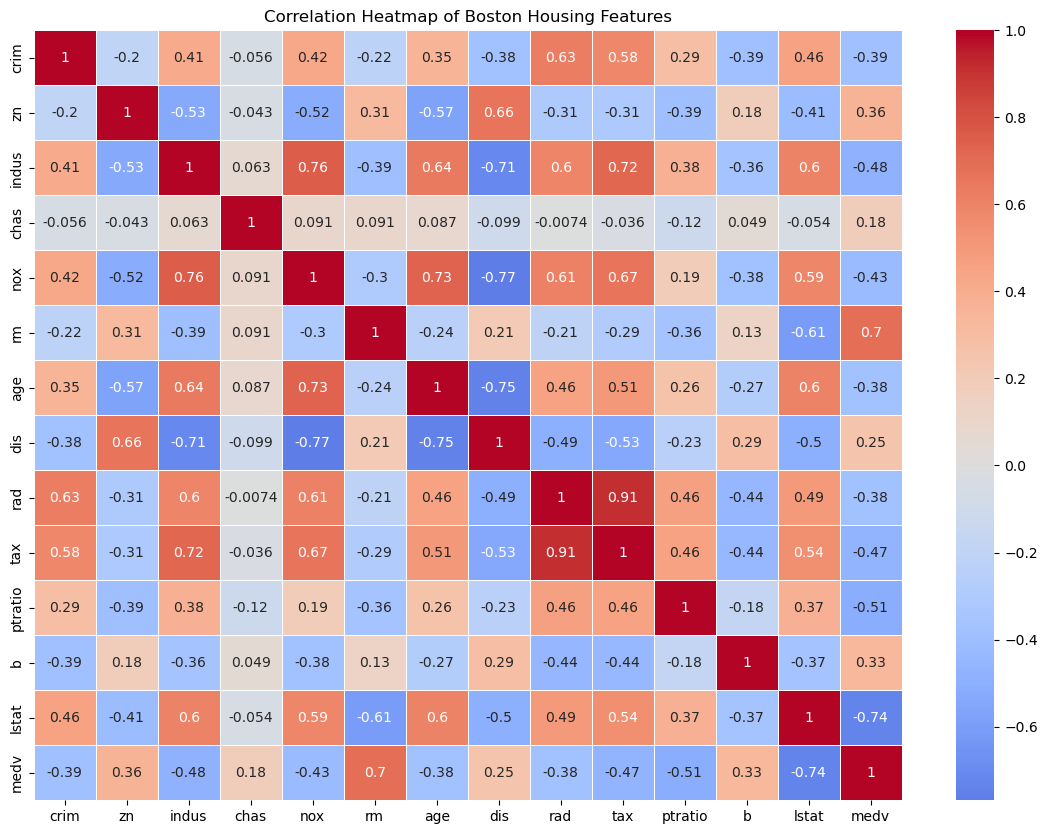

In [5]:
# Necessary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv")

# Calculate the correlation matrix again
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=.5)

# Set the title for the heatmap
plt.title("Correlation Heatmap of Boston Housing Features")

plt.show()




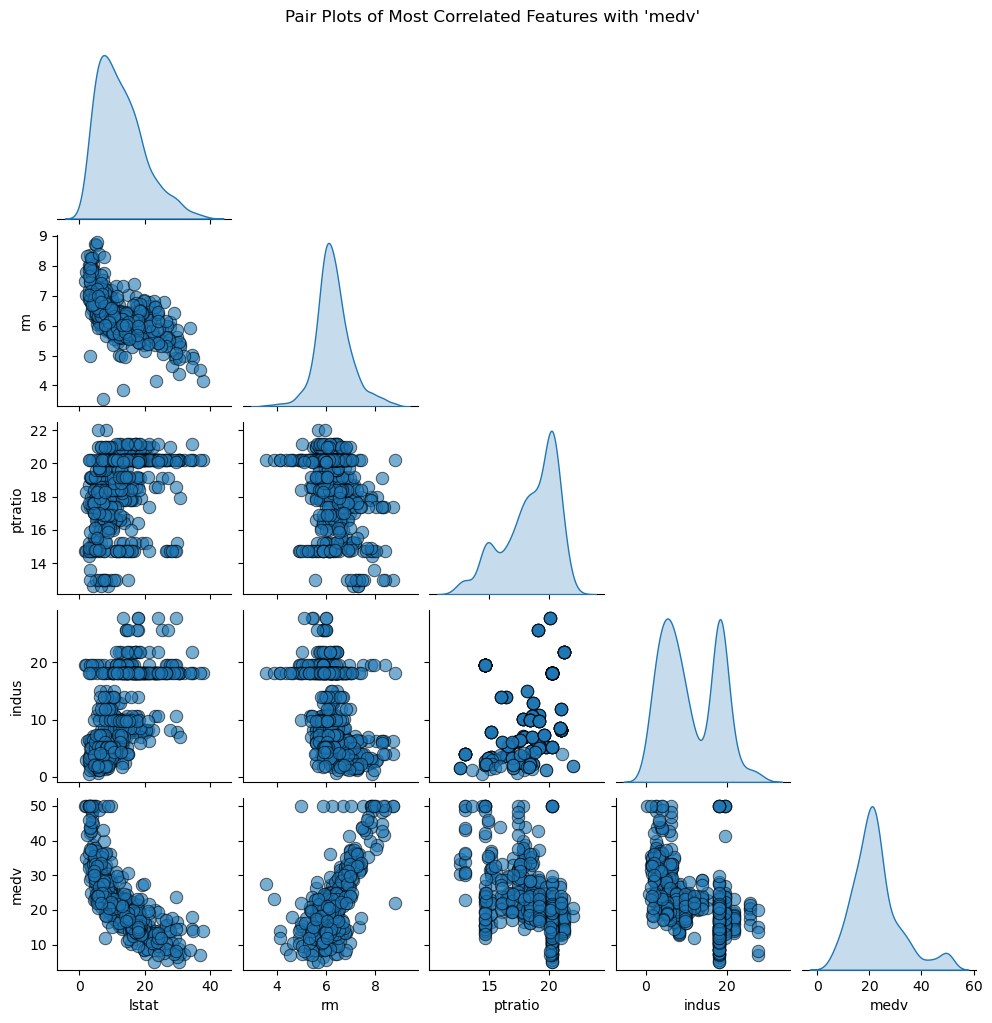

In [6]:
# Select features that have a correlation coefficient greater than 0.6 (in absolute value) with the target variable 'medv'
selected_features = correlation_matrix['medv'].apply(abs).sort_values(ascending=False).index[1:5].to_list()

# Include the target variable 'medv' in the list for pair plotting
selected_features.append('medv')

# Plotting the pair plots
sns.pairplot(df[selected_features], corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2)

plt.suptitle("Pair Plots of Most Correlated Features with 'medv'", y=1.02)
plt.show()


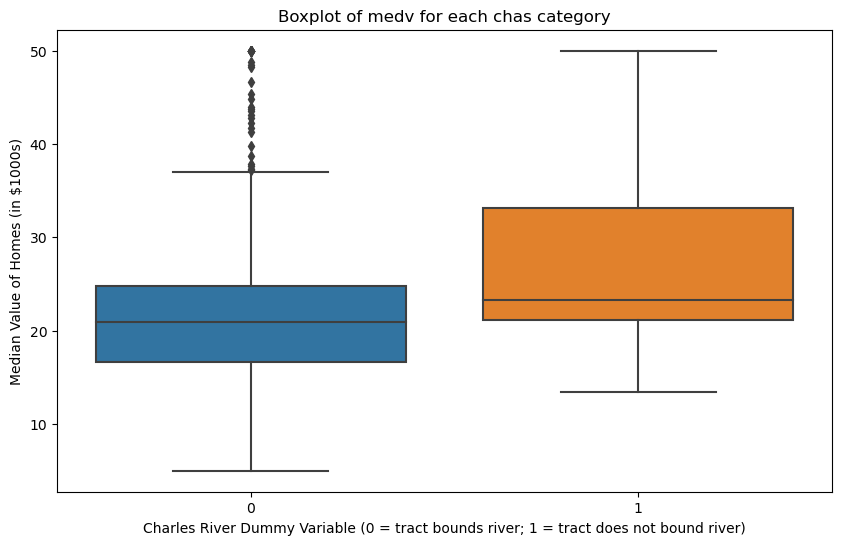

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot comparing the median values of homes that border the Charles River to those that don't
sns.boxplot(x='chas', y='medv', data=df)

# Title and labels for the plot
plt.title('Boxplot of medv for each chas category')
plt.xlabel('Charles River Dummy Variable (0 = tract bounds river; 1 = tract does not bound river)')
plt.ylabel('Median Value of Homes (in $1000s)')

# Display the plot
plt.show()



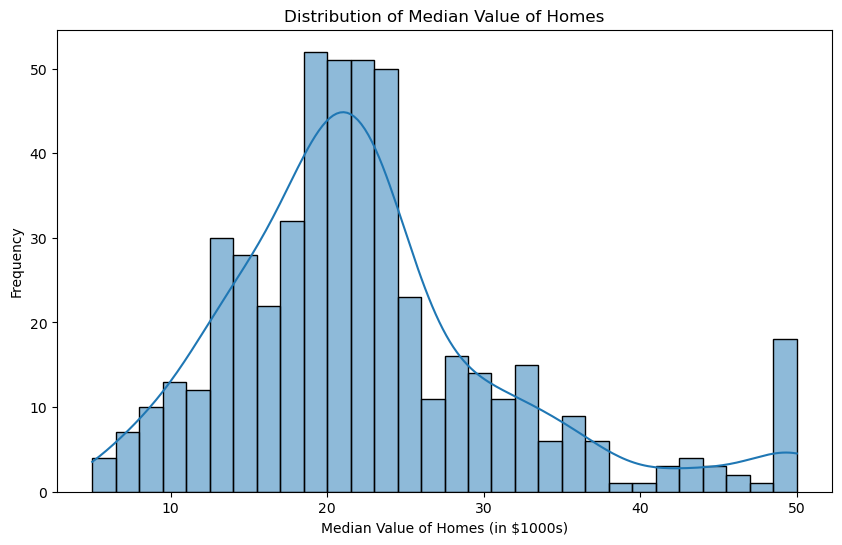

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a histogram for the median values of homes along with a KDE (Kernel Density Estimate)
sns.histplot(df['medv'], bins=30, kde=True)

# Title and labels for the plot
plt.title('Distribution of Median Value of Homes')
plt.xlabel('Median Value of Homes (in $1000s)')
plt.ylabel('Frequency')

# Display the plot
plt.show()



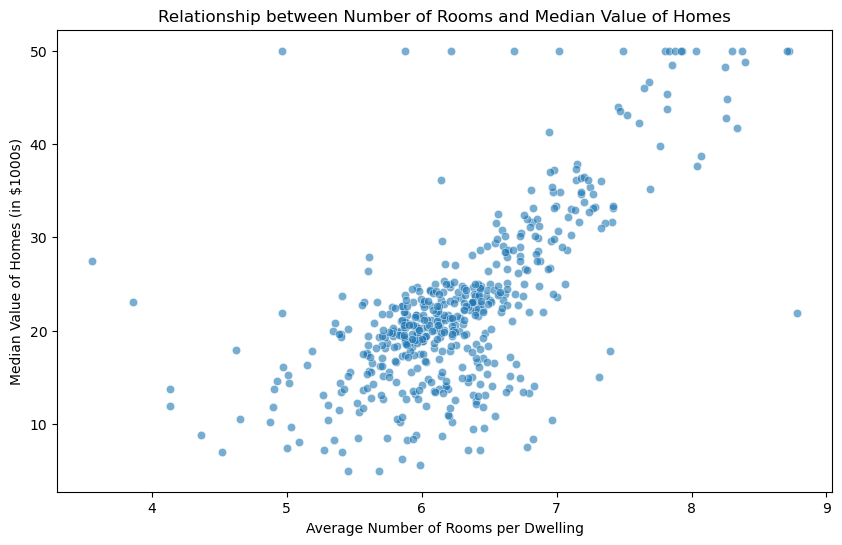

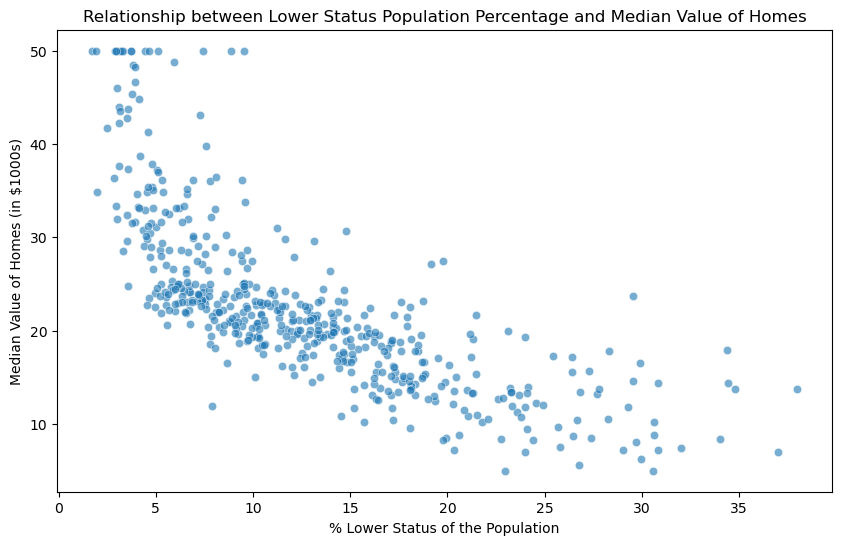

In [10]:
# Scatter plot for rm vs medv
plt.figure(figsize=(10, 6))

# Create a scatter plot showing the relationship between the number of rooms and the median value of homes
sns.scatterplot(x='rm', y='medv', data=df, alpha=0.6)

# Title and labels for the plot
plt.title('Relationship between Number of Rooms and Median Value of Homes')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Homes (in $1000s)')

# Display the plot
plt.show()

# Scatter plot for lstat vs medv
plt.figure(figsize=(10, 6))

# Create a scatter plot showing the relationship between the % of lower status of the population and the median value of homes
sns.scatterplot(x='lstat', y='medv', data=df, alpha=0.6)

# Title and labels for the plot
plt.title('Relationship between Lower Status Population Percentage and Median Value of Homes')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Median Value of Homes (in $1000s)')

# Display the plot
plt.show()


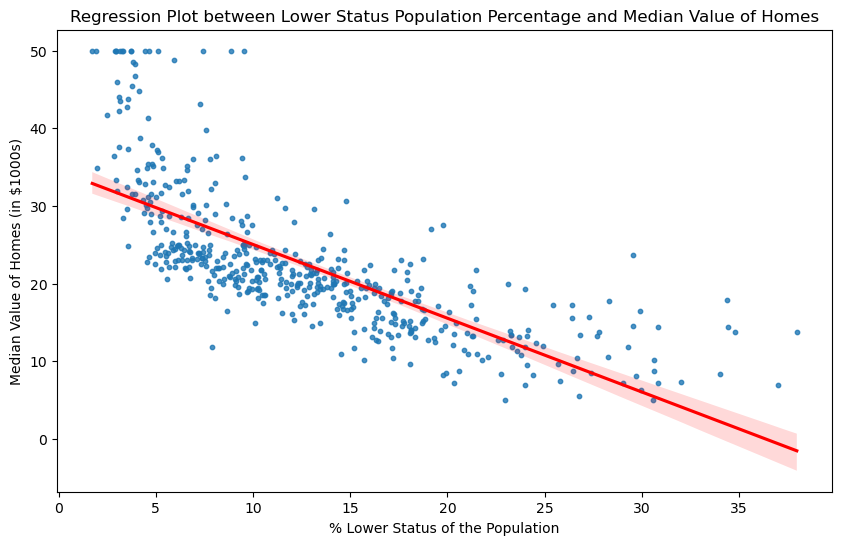

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a regression plot showing the line of best fit for lstat and medv
sns.regplot(x='lstat', y='medv', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Title and labels for the plot
plt.title('Regression Plot between Lower Status Population Percentage and Median Value of Homes')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Median Value of Homes (in $1000s)')

# Display the plot
plt.show()


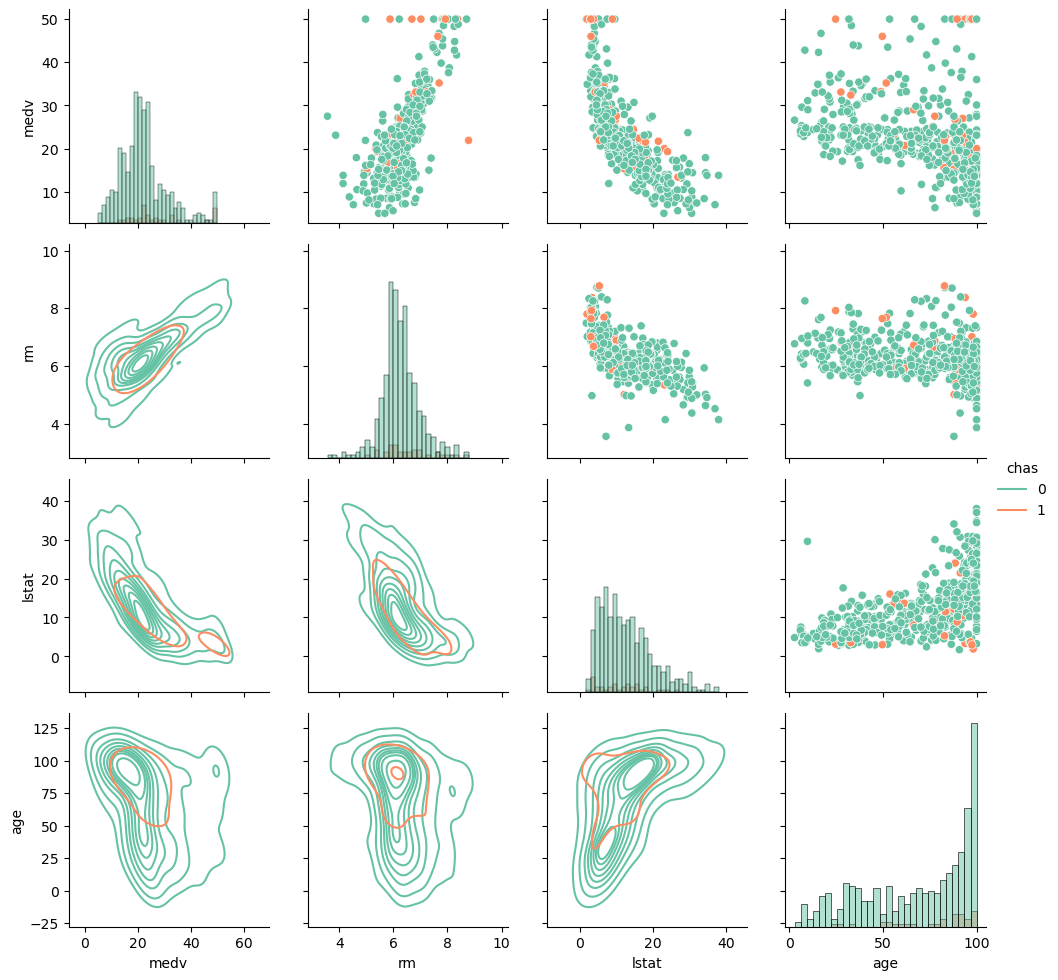

In [13]:
# Initialize a PairGrid for selected variables, colored by proximity to the Charles River.
g = sns.PairGrid(df, vars=["medv", "rm", "lstat", "age"], hue="chas", palette="Set2")

# Use scatter plots for the upper triangle.
g.map_upper(sns.scatterplot)

# Use KDE plots for the lower triangle.
g.map_lower(sns.kdeplot)

# Use histograms for the diagonal.
g.map_diag(sns.histplot, bins=30)

# Add a legend for clarity.
g.add_legend()

# Display the plot.
plt.show()


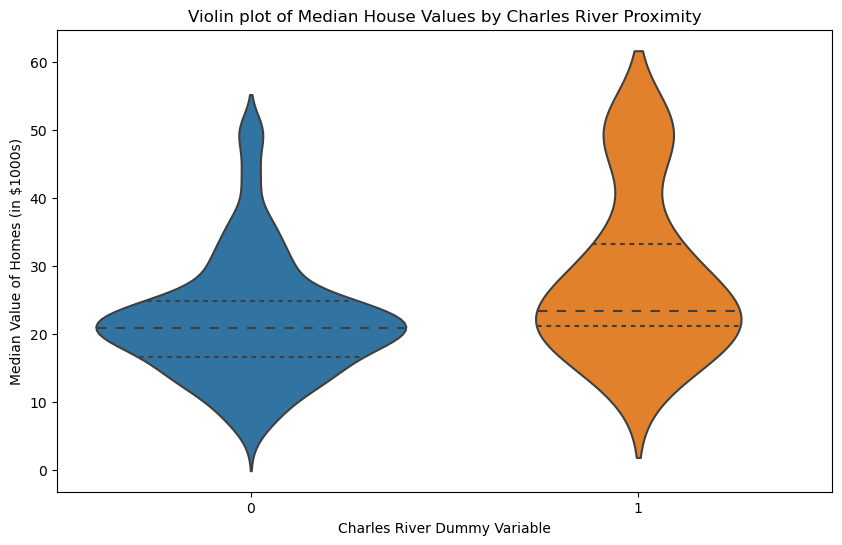

In [14]:
# Set up the figure size.
plt.figure(figsize=(10, 6))

# Create a violin plot for median house values split by proximity to the Charles River.
sns.violinplot(x="chas", y="medv", data=df, inner="quartile")

# Add title and axis labels.
plt.title("Violin plot of Median House Values by Charles River Proximity")
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Median Value of Homes (in $1000s)')

# Display the plot.
plt.show()


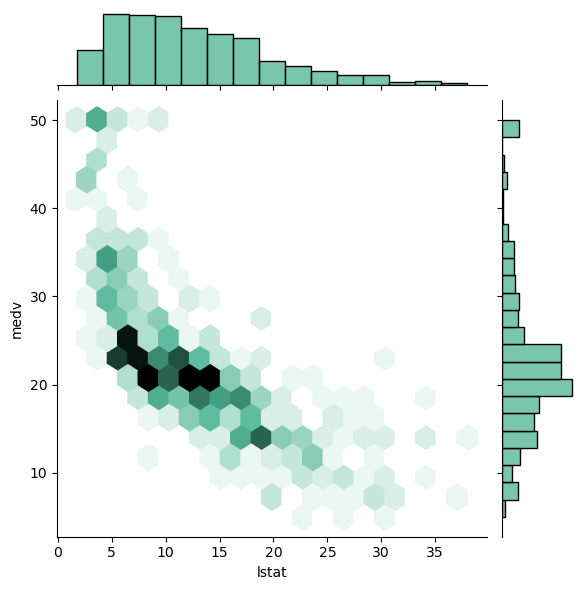

In [15]:
# Create a joint plot for % lower status of the population vs median value of homes.
# Use hexagons as bins.
sns.jointplot(x="lstat", y="medv", data=df, kind="hex", color="#4CB391")

# Display the plot.
plt.show()


In [18]:
# Import the necessary library
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='rm', y='lstat', z='medv', color='medv',
                    labels={
                        "rm": "Number of Rooms",
                        "lstat": "% Lower Status of the Population",
                        "medv": "Median Value of Homes (in $1000s)"
                    },
                    title="Interactive 3D Scatter Plot of RM, LSTAT, and MEDV")

# Display the interactive plot
fig.show()



In [17]:
# Note: You need to have Plotly installed to execute this block.
import plotly.express as px

# Create an interactive scatter plot for lstat vs medv, colored by proximity to the Charles River.
fig = px.scatter(df, x="lstat", y="medv", color="chas", title="Interactive Scatter Plot of lstat vs medv colored by chas",
                 labels={"lstat": "% Lower Status of the Population", "medv": "Median Value of Homes (in $1000s)"})

# Display the interactive plot.
fig.show()


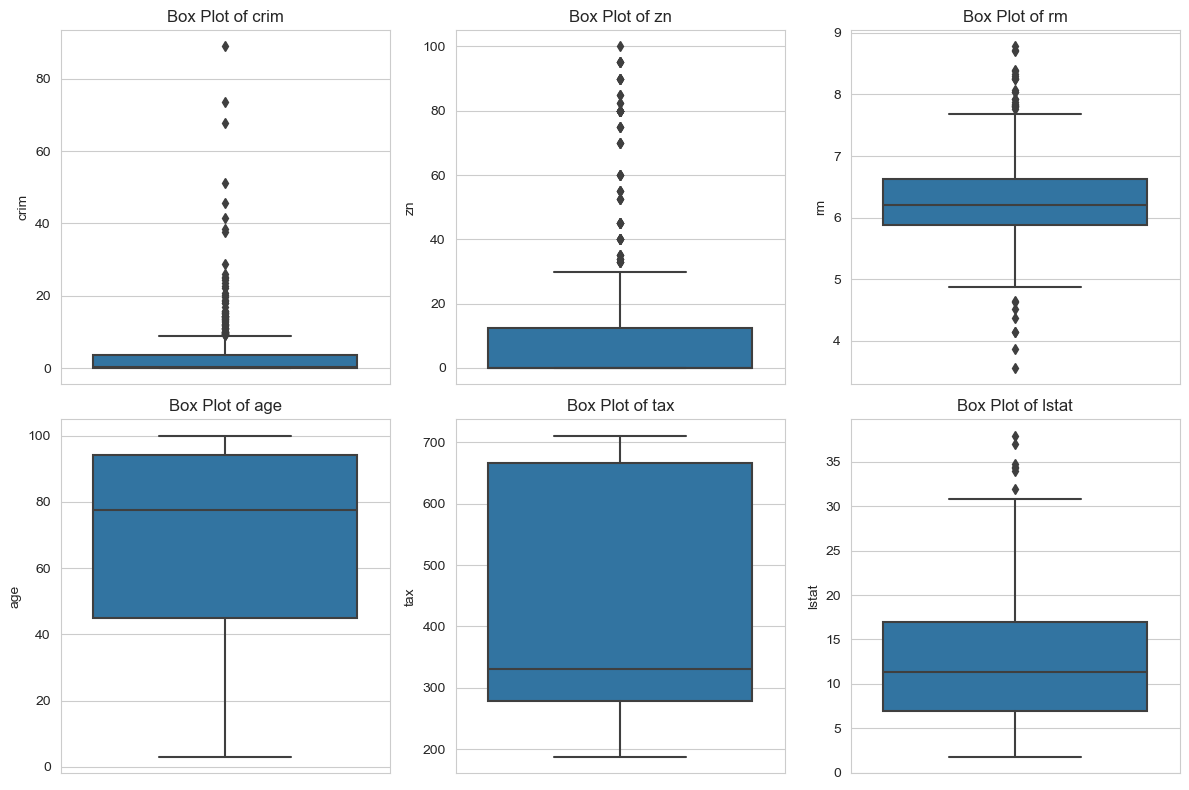

In [21]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few features for box plots
features = ['crim', 'zn', 'rm', 'age', 'tax', 'lstat']

# Setting up the figure size for the plots
plt.figure(figsize=(12, 8))

# Iterating through the selected features and plotting box plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arranging the plots in 2 rows and 3 columns
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()  # Adjusting the layout for better visualization

plt.show()


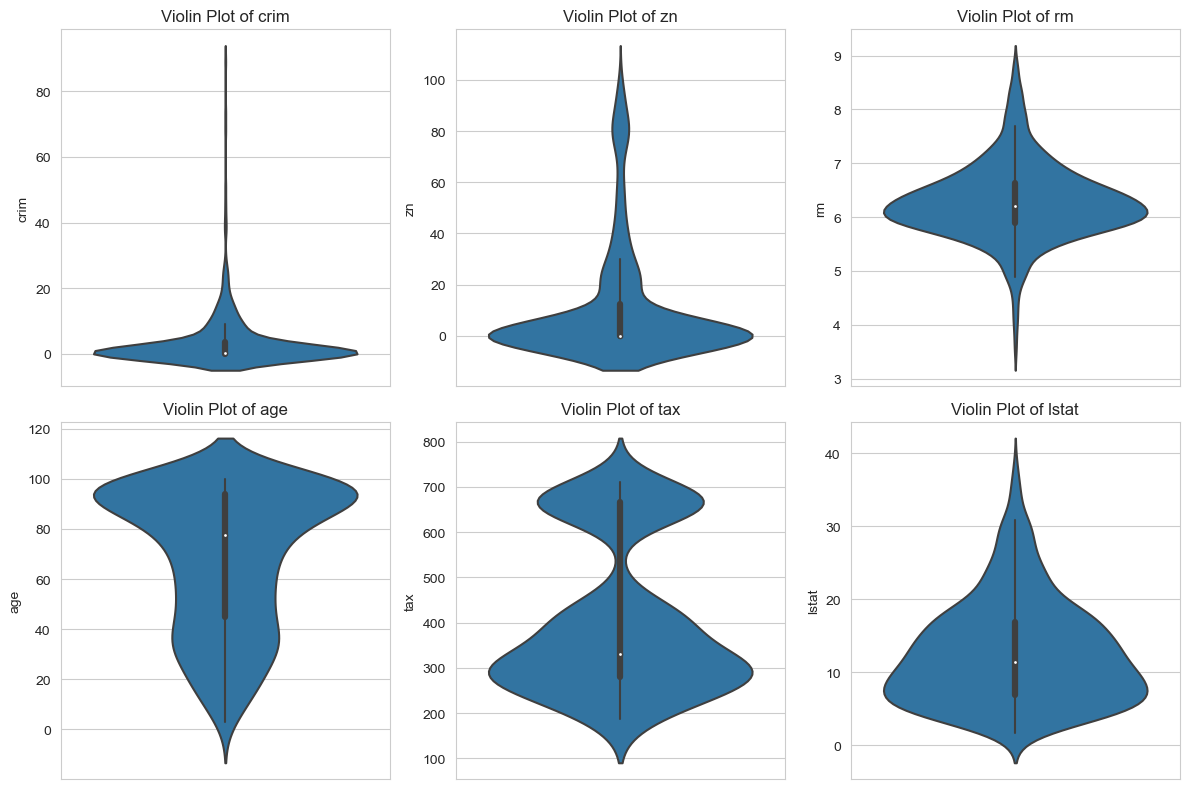

In [22]:
# Setting up the figure size for the plots
plt.figure(figsize=(12, 8))

# Iterating through the selected features and plotting violin plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arranging the plots in 2 rows and 3 columns
    sns.violinplot(y=df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.tight_layout()  # Adjusting the layout for better visualization

plt.show()


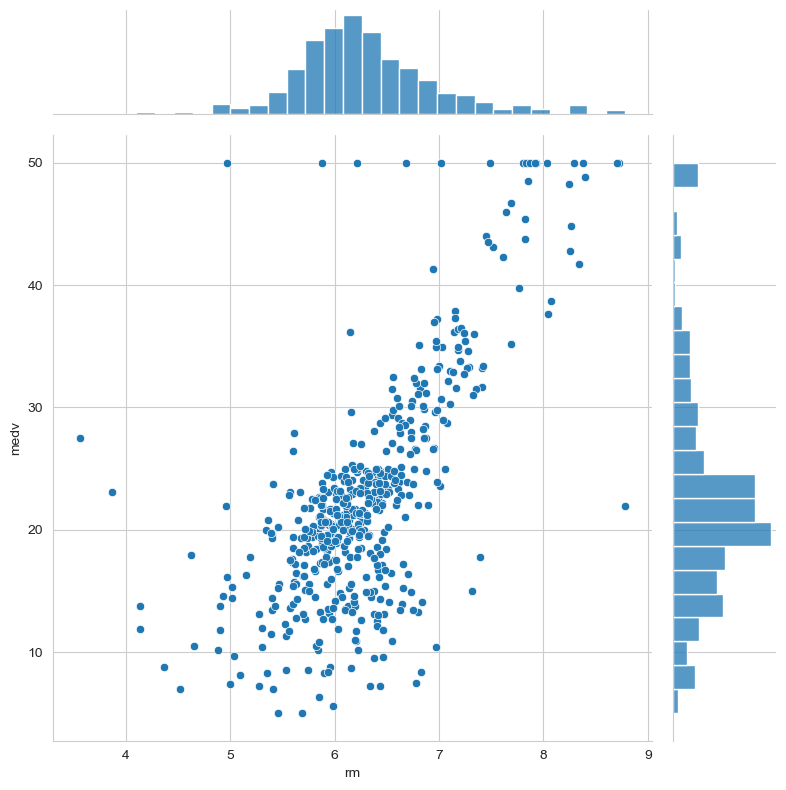

In [23]:
# Plotting a joint plot to visualize the relationship between 'rm' (number of rooms) and 'medv' (housing price)
sns.jointplot(x=df['rm'], y=df['medv'], kind='scatter', height=8)
plt.show()


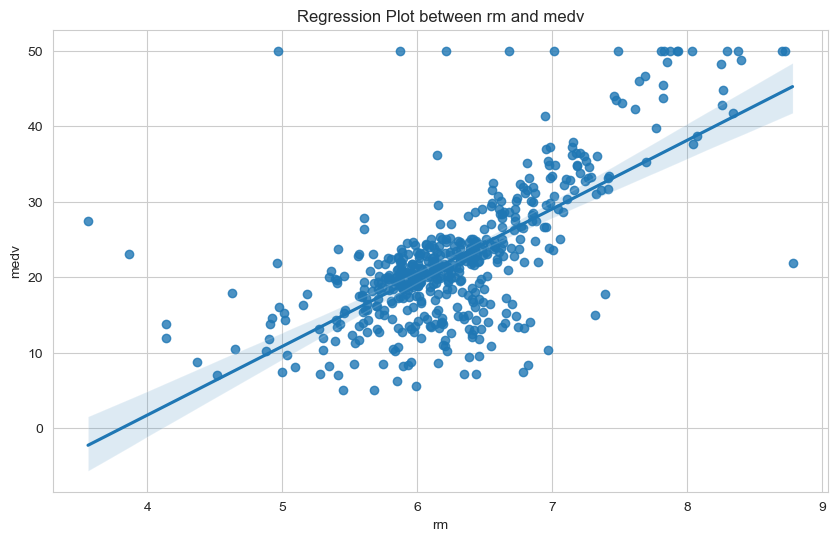

In [24]:
# Plotting a regression plot to visualize the linear relationship between 'rm' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x=df['rm'], y=df['medv'])
plt.title('Regression Plot between rm and medv')
plt.show()


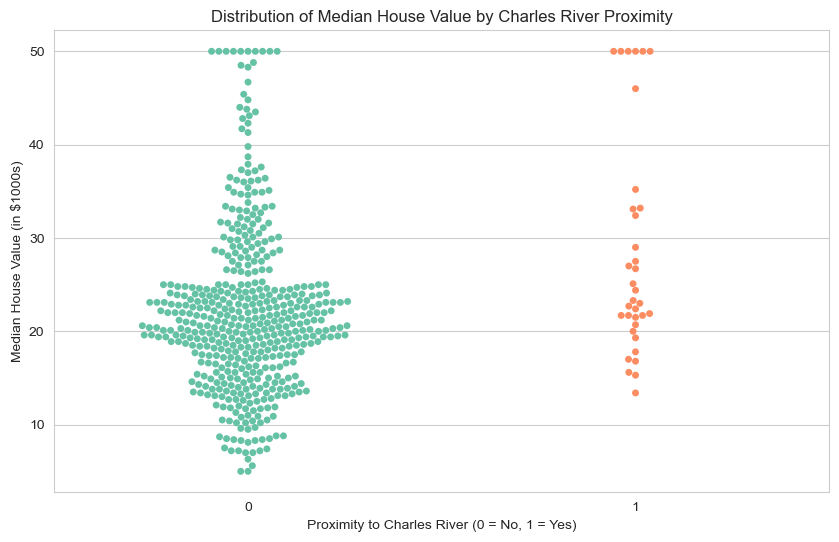

In [26]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a Swarm Plot for medv based on the chas feature
# This visualizes the distribution of median house values based on their proximity to the Charles River.
sns.swarmplot(x='chas', y='medv', data=df, palette="Set2")

# Set the title and labels for the plot
plt.title('Distribution of Median House Value by Charles River Proximity')
plt.xlabel('Proximity to Charles River (0 = No, 1 = Yes)')
plt.ylabel('Median House Value (in $1000s)')

# Display the plot
plt.show()



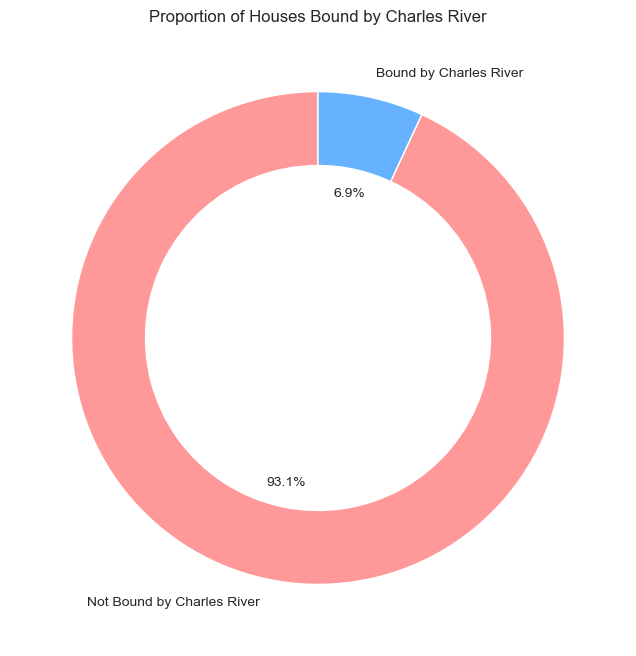

In [27]:
# Count the values for the chas feature
chas_counts = df['chas'].value_counts()

# Set up the figure and axes
plt.figure(figsize=(8, 8))

# Plot a donut chart to represent the proportion of houses bound by the Charles River
plt.pie(chas_counts, labels=['Not Bound by Charles River', 'Bound by Charles River'], 
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=["#FF9999", "#66B2FF"])

# Set the title for the plot
plt.title('Proportion of Houses Bound by Charles River')

# Display the plot
plt.show()


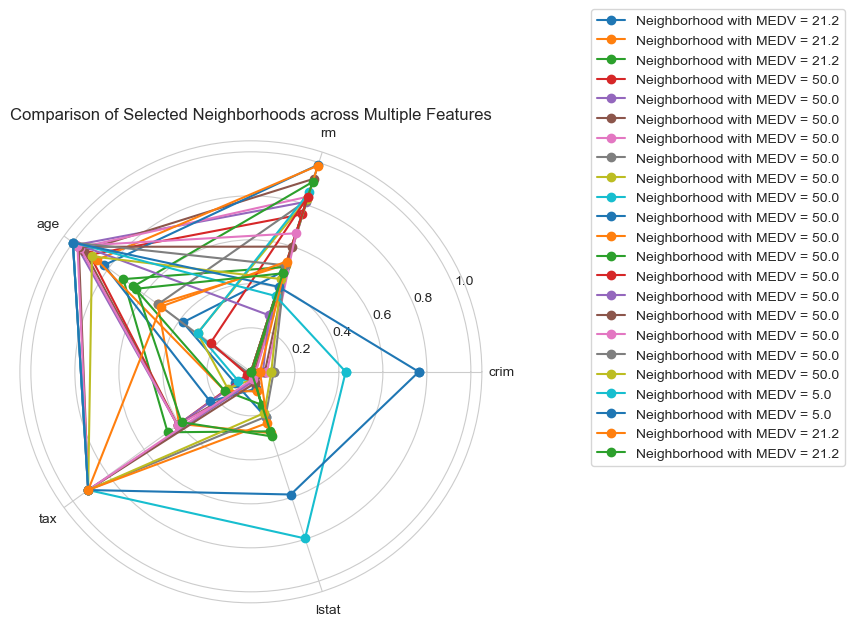

In [35]:
from math import pi

# Select a few neighborhoods based on their median value
selected_neighborhoods = df[df['medv'].isin([df['medv'].min(), df['medv'].median(), df['medv'].max()])]

# List of features to compare
features = ['crim', 'rm', 'age', 'tax', 'lstat']

# Normalize the data for these features
normalized_data = (selected_neighborhoods[features] - df[features].min()) / (df[features].max() - df[features].min())

# Add a column for full circle (to close the radar chart)
normalized_data['full_circle'] = normalized_data['crim']

# Number of features to compare
N = len(features)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Set the angles for the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot the radar chart for each selected neighborhood
for idx, row in normalized_data.iterrows():
    plt.polar(angles, row, marker='o', label=f"Neighborhood with MEDV = {df.loc[idx, 'medv']}")

# Add feature labels to the plot
plt.xticks(angles[:-1], features)

# Set the title
plt.title('Comparison of Selected Neighborhoods across Multiple Features')

# Adjust the legend's position further to the right so it doesn't overlap with the title
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1.3))

# Display the plot
plt.show()




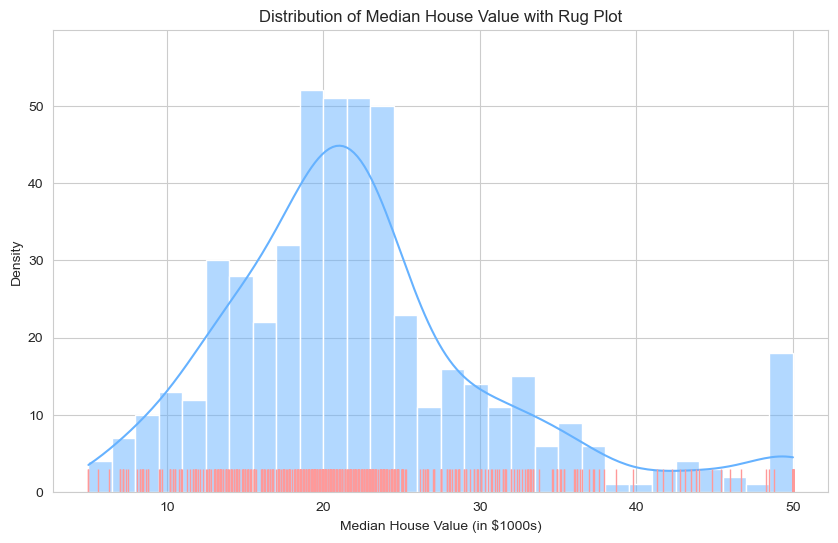

In [31]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram for the medv feature using histplot
sns.histplot(df['medv'], kde=True, bins=30, color="#66B2FF")

# Add a rug plot to represent individual data points
sns.rugplot(df['medv'], color="#FF9999", height=0.05)

# Set the title and labels for the plot
plt.title('Distribution of Median House Value with Rug Plot')
plt.xlabel('Median House Value (in $1000s)')
plt.ylabel('Density')

# Display the plot
plt.show()

